In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import polyfit ,polyval

def cheb(n):
  from numpy.matlib import repmat as repmat
  if n == 0:
    D = 0 ; x = 1
    return D,x
  else:
    x = np.cos(np.pi*np.arange(0,n+1,1)/n)
    c1 = np.array(np.ones(n-1)) ; c1 = np.append(c1,2) ; c1 = np.insert(c1,0,2)
    c2 = (-1)** np.arange(0,n +1,1)
    c = c1 * c2
    X = repmat(np.matrix(x).T,1,n+1)
    dX = X - X.T
    D = (np.matrix(c).T * 1/np.matrix(c)) / (dX+(np.eye(n+1)))
    D = D - np.diagflat(sum(D.T))
    return D,x

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 7 Text major ticklabel objects>)

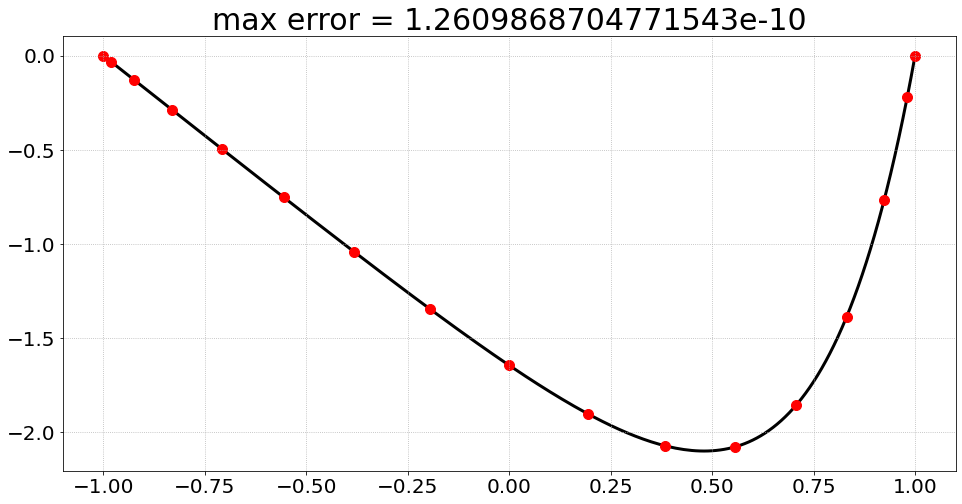

In [ ]:
N = 16
D ,x = cheb(N)
D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
f = np.e **(4 *x[1:N])
u = np.linalg.solve(D2,f)
u = np.append(np.append([0],u),0)

xx = np.arange(-1,1 +0.01,0.01)
uu = polyval(polyfit(x,u,N),xx)

exact = (np.power(np.e,(4*xx)) - np.sinh(4)*xx - np.cosh(4))/16

plt.figure(figsize=(16,8))
plt.plot(xx,uu,linewidth=3,color='black',zorder=0)
plt.scatter(x,u,marker='o',s=100,color='red')
plt.title(r'max error = '+str(max(abs(uu-exact))),fontsize=30)
plt.grid(linestyle=':')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 7 Text major ticklabel objects>)

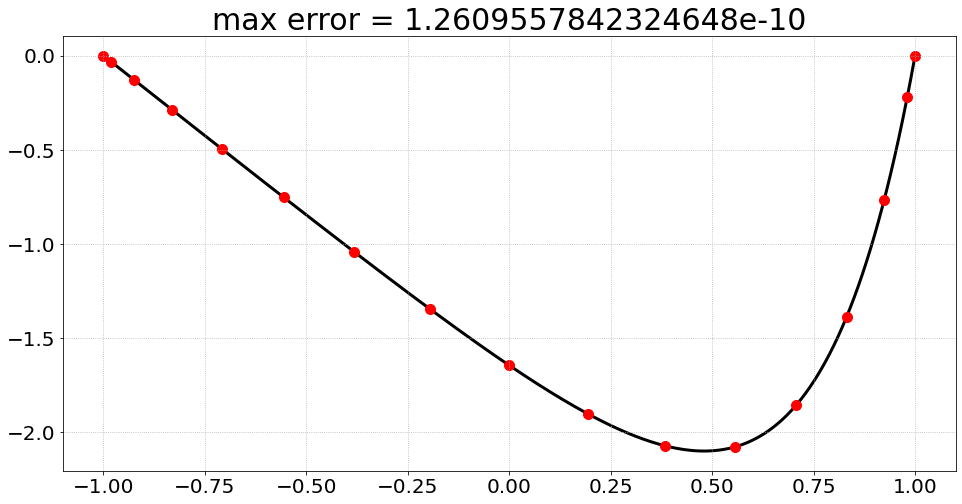

In [ ]:
plt.close()

N = 16
D ,x = cheb(N)
matrix = np.zeros_like(D**2)
input = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
matrix[1:N,1:N] = np.reshape(input,(N-1,-1)) ; matrix[0,0] = 1 ; matrix[N,N] = 1
f = np.e **(4 *x)
f = np.append(np.append([0],f[1:N]),0)
u = np.linalg.inv(matrix) * np.matrix(f).T

xx = np.arange(-1,1 +0.01,0.01)
uu = polyval(polyfit(x,u,N),xx)

exact = (np.power(np.e,(4*xx)) - np.sinh(4)*xx - np.cosh(4))/16

plt.figure(figsize=(16,8))
plt.plot(xx,uu,linewidth=3,color='black',zorder=0)
plt.scatter(x,np.array(u.flatten()),marker='o',s=100,color='red')
plt.title(r'max error = '+str(max(abs(uu-exact))),fontsize=30)
plt.grid(linestyle=':')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,
         0.05]), <a list of 10 Text major ticklabel objects>)

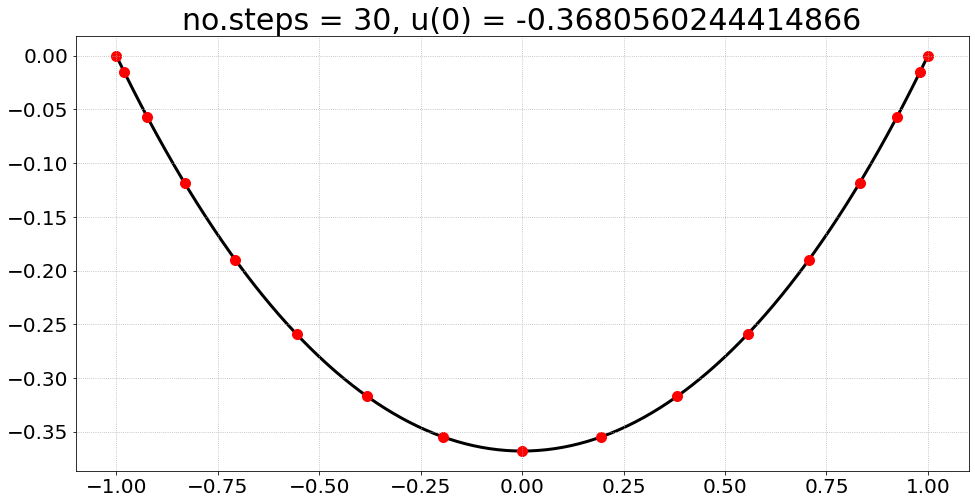

In [ ]:
plt.close()

N = 16
D, x = cheb(N)
D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
u = np.zeros(N-1)
change = 1 ; it = 0

while change > 1 * 10**(-15):
  unew = np.linalg.solve(D2,np.e **u)
  change = max(abs(unew-u))
  it += 1
  u = unew

u = np.append(np.append([0],u),0)

xx = np.arange(-1,1 +0.01,0.01)
uu = polyval(polyfit(x,u,N),xx)

plt.figure(figsize=(16,8))
plt.plot(xx,uu,linewidth=3,color='black',zorder=0)
plt.scatter(x,u,marker='o',s=100,color='red')
plt.title("no.steps = "+ str(it) + ", u(0) = "+ str(min(u)),fontsize=30)
plt.grid(linestyle=':')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,
         0.05]), <a list of 10 Text major ticklabel objects>)

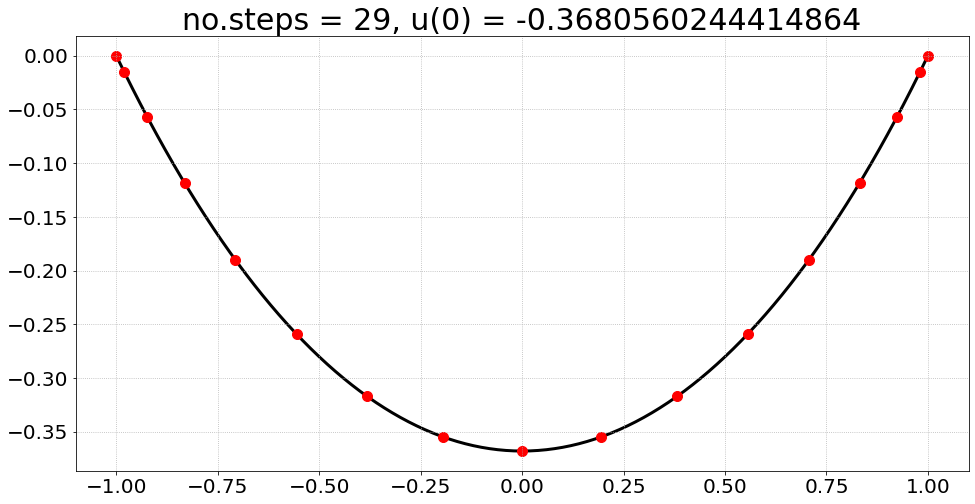

In [ ]:
plt.close()

N = 16
D ,x = cheb(N)
matrix = np.zeros_like(D**2)
input = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
matrix[1:N,1:N] = np.reshape(input,(N-1,-1)) ; matrix[0,0] = 1 ; matrix[N,N] = 1
#f = np.e **(4 *x)
#f = np.append(np.append([0],f[1:N]),0)
#u = np.linalg.inv(matrix) * np.matrix(f).T

u = np.matrix(np.zeros(N+1)).T
change = 1 ; it = 0


while change > 1 * 10**(-15):
  unew = np.linalg.inv(matrix) * np.power(np.e,u)
  unew[0,0] = 0 ; unew[N,0] = 0
  change = abs(unew.flatten() - u.flatten()).max()
  it += 1
  u = unew

xx = np.arange(-1,1 +0.01,0.01)
uu = polyval(polyfit(x,u,N),xx)

plt.figure(figsize=(16,8))
plt.plot(xx,uu,linewidth=3,color='black',zorder=0)
plt.scatter(x,np.array(u.flatten()),marker='o',s=100,color='red')
plt.title("no.steps = "+ str(it) + ", u(0) = "+ str((u.flatten()).min()),fontsize=30)
plt.grid(linestyle=':')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

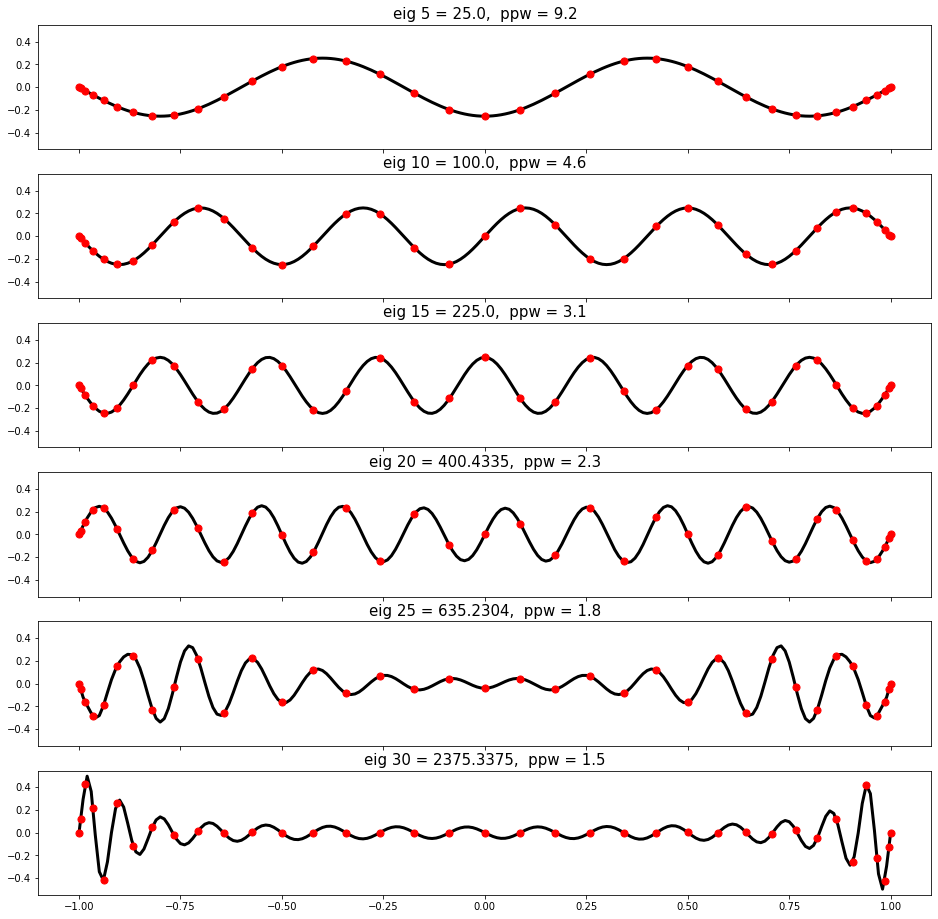

In [ ]:
plt.close()

from numpy.linalg import eig

N = 36
D,x = cheb(N)
D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)

w,v = eig(D2)
lam = np.sort(-w)
index = np.argsort(-w)
v = v[:,index]

xx = np.arange(-1,1 +0.01,0.01)

fig, ax = plt.subplots(6,1,sharex=True,sharey=True,figsize=(16,16))
for j in np.arange(5,30 +5,5):
  ax_index = int((j/5)-1)
  new_v = v[:,j-1]
  u = np.append(np.append([0],new_v),0)
  uu = polyval(polyfit(x,u,N),xx)
  ax[ax_index].scatter(x,u,marker='o',s=50,color='red')
  ax[ax_index].plot(xx,uu,linewidth=3,color='black',zorder=0)
  ax[ax_index].set_title("eig " + str(j) + " = " + str(round((lam[j-1]*4/np.pi**2),4)) +",  ppw = "+ str(round((4*N)/(np.pi*j),1)),fontsize=15)

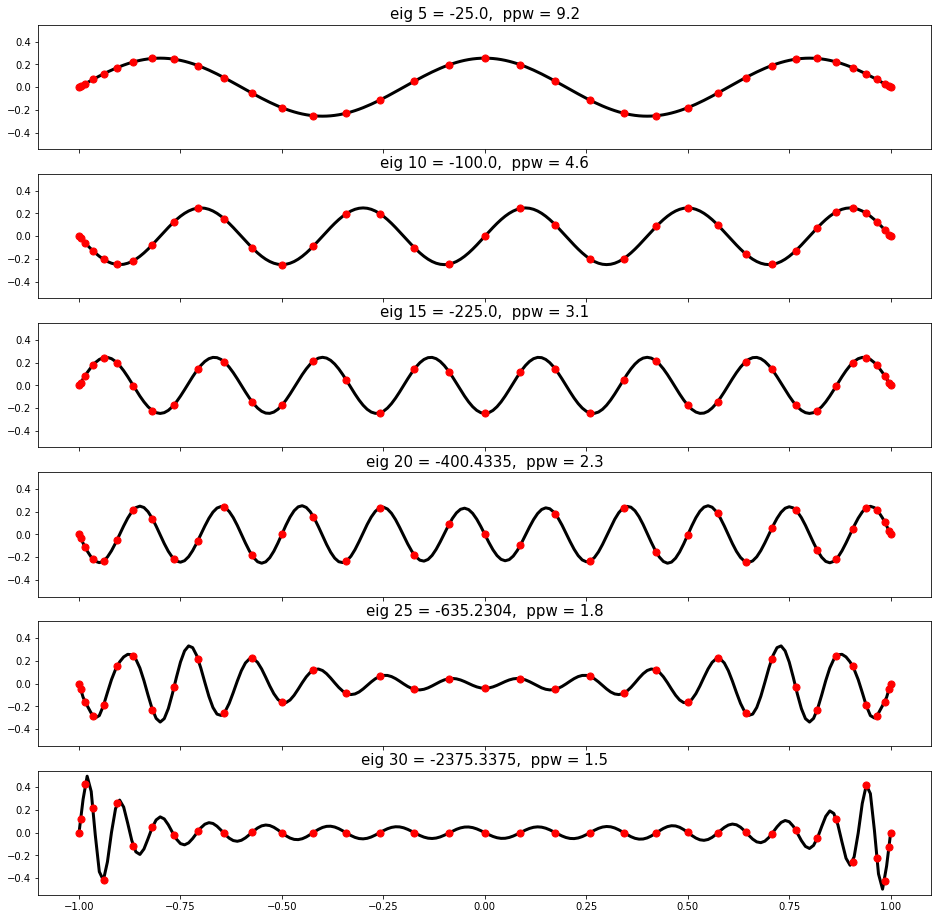

In [ ]:
plt.close()

from numpy.linalg import eig

N = 36
D,x = cheb(N)
matrix = np.zeros_like(D**2)
input = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
matrix[1:N,1:N] = np.reshape(input,(N-1,-1)) ; matrix[0,0] = 1 ; matrix[N,N] = 1

w,v = eig(matrix)
lam = -(np.sort(abs(w)))
index = np.argsort(abs(w))
v = v[:,index]

xx = np.arange(-1,1 +0.01,0.01)

fig, ax = plt.subplots(6,1,sharex=True,sharey=True,figsize=(16,16))
for j in np.arange(5,30 +5,5):
  ax_index = int((j/5)-1)
  new_v = v[:,j+1]
  u = new_v
#  u = np.append(np.append([0],new_v),0)
  uu = polyval(polyfit(x,u,N),xx)
  ax[ax_index].scatter(x,np.array(u.flatten()),marker='o',s=50,color='red')
  ax[ax_index].plot(xx,uu,linewidth=3,color='black',zorder=0)
  ax[ax_index].set_title("eig " + str(j) + " = " + str(round((lam[j+1]*4/np.pi**2),4)) +",  ppw = "+ str(round((4*N)/(np.pi*j),1)),fontsize=15)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text major ticklabel objects>)

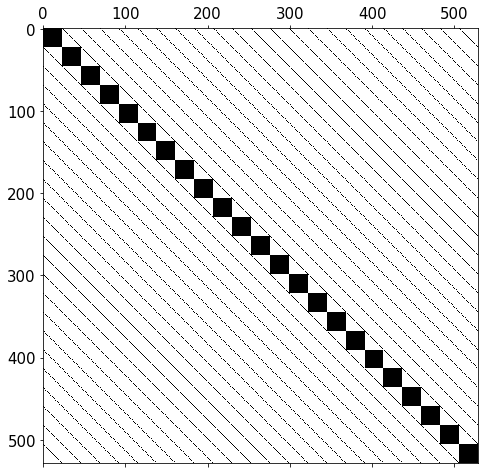

In [ ]:
plt.close()

N = 24

D,x = cheb(N)
y = x
xx, yy = np.meshgrid(x[1:N],y[1:N])
xx = xx.flatten() ; yy = yy.flatten()
f = 10 * np.sin(8*xx*(yy-1))
D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
I = np.eye(N-1)
L = np.kron(I,D2) + np.kron(D2,I)

plt.figure(figsize=(8,8))

plt.spy(L)
plt.xticks(fontsize=15) ; plt.yticks(fontsize = 15)

Text(0.25, -0.75, '$\\mu(2^{-\\,\\frac{1}{2}},2^{\\,\\frac{1}{2}}$)=0.3207159451075717')

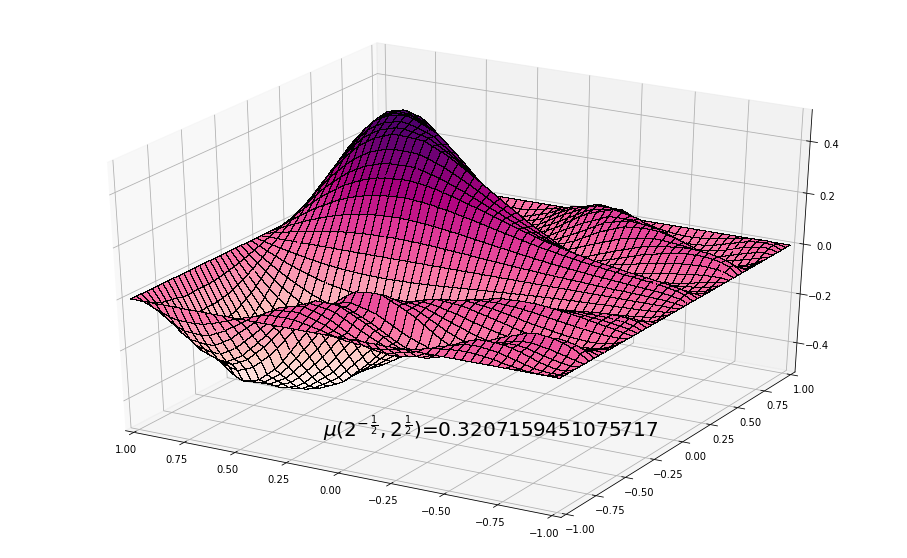

In [ ]:
plt.close()

u = np.linalg.solve(L,f)

uu = np.zeros((N+1,N+1)) ; uu[1:N,1:N] = np.reshape(u,(N-1,-1))
xx, yy = np.meshgrid(x,y)
value = uu[int(N/4)][int(N/4)]

from scipy.interpolate import interp2d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

xxx = np.arange(-1,1 +0.04,0.04)
yyy = np.arange(-1,1 +0.04,0.04)

xi, yi =np.meshgrid(xxx,yyy)

interp_spline = interp2d(xx,yy,uu)
uuu = interp_spline(xxx,yyy)
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')
ax.plot_surface(yi,xi,uuu,rstride=1,cstride=1,cmap=cm.RdPu,linewidth=0.005,edgecolors='black',antialiased=False)
ax.set_xlim(1,-1) ; ax.set_ylim(-1,1) ; ax.set_zlim(-0.5,0.5)
ax.text(0.25,-0.75,-0.5,r"$\mu(2^{-\,\frac{1}{2}},2^{\,\frac{1}{2}}$)="+str(value),fontsize=20)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

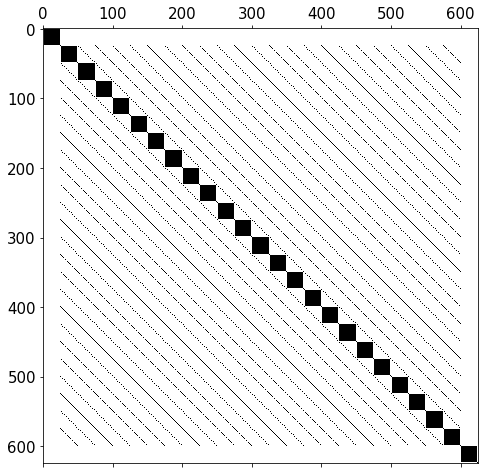

In [ ]:
plt.close()

N = 24

D,x = cheb(N)
y = x
xx, yy = np.meshgrid(x,y)
xx = xx.flatten() ; yy = yy.flatten()
f = 10 * np.sin(8*xx*(yy-1))

matrix = np.zeros_like(D**2)
input = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
matrix[1:N,1:N] = np.reshape(input,(N-1,-1)) ; matrix[0,0] = 1 ; matrix[N,N] = 1

I = np.eye(N+1)
L = np.kron(I,matrix) + np.kron(matrix,I)

plt.figure(figsize=(8,8))

plt.spy(L)
plt.xticks(fontsize=15) ; plt.yticks(fontsize = 15)

Text(0.25, -0.75, '$\\mu(2^{-\\,\\frac{1}{2}},2^{\\,\\frac{1}{2}}$)=0.3207159451075712')

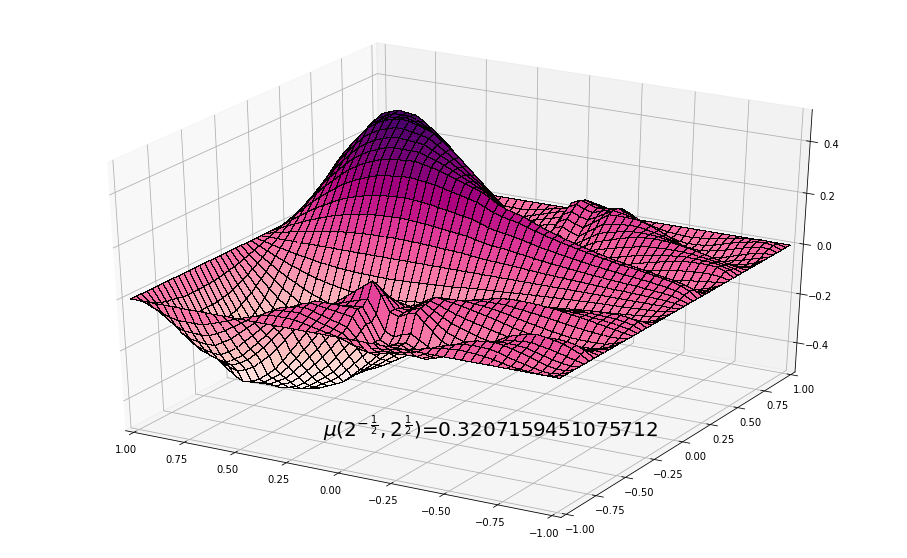

In [ ]:
plt.close()

u = np.linalg.inv(L) * np.matrix(f).T

uu = np.reshape(u,(N+1,-1))
uu[:,0] = 0 ; uu[0,:] = 0 ; uu[:,N] = 0 ; uu[N,:] = 0

xx, yy = np.meshgrid(x,y)
value = uu[int(N/4),int(N/4)]

from scipy.interpolate import interp2d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

xxx = np.arange(-1,1 +0.04,0.04)
yyy = np.arange(-1,1 +0.04,0.04)

xi, yi =np.meshgrid(xxx,yyy)

interp_spline = interp2d(xx,yy,uu)
uuu = interp_spline(xxx,yyy)
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')
ax.plot_surface(yi,xi,uuu,rstride=1,cstride=1,cmap=cm.RdPu,linewidth=0.005,edgecolors='black',antialiased=False)
ax.set_xlim(1,-1) ; ax.set_ylim(-1,1) ; ax.set_zlim(-0.5,0.5)
ax.text(0.25,-0.75,-0.5,r"$\mu(2^{-\,\frac{1}{2}},2^{\,\frac{1}{2}}$)="+str(value),fontsize=20)

Text(0.75, 0, '$\\mu$(0,0)=0.01172257000265297')

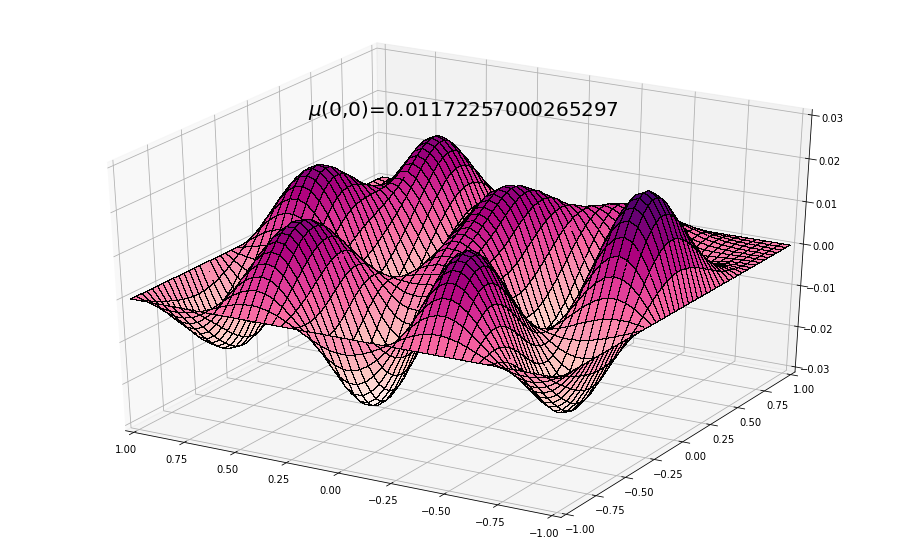

In [ ]:
plt.close()

N = 24
D,x = cheb(N)
y = x
xx, yy = np.meshgrid(x[1:N],y[1:N])
xx = xx.flatten() ; yy = yy.flatten()
f = np.e ** (-10 * ((yy-1)**2 + (xx-0.5)**2))

D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
I = np.eye(N-1)
k = 9
L = np.kron(I,D2) + np.kron(D2,I) + k**2 * np.eye((N-1)**2)

u = np.linalg.solve(L,f)

uu = np.zeros((N+1,N+1)) ; uu[1:N,1:N] = np.reshape(u,(N-1,-1))
value = uu[int(N/2)][int(N/2)]

xx, yy = np.meshgrid(x,y)

xxx = np.arange(-1,1 +0.04,0.04)
yyy = np.arange(-1,1 +0.04,0.04)

xi, yi =np.meshgrid(xxx,yyy)

interp_spline = interp2d(xx,yy,uu,kind="cubic")
uuu = interp_spline(xxx,yyy)

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')
ax.plot_surface(yi,xi,uuu,rstride=1,cstride=1,cmap=cm.RdPu,linewidth=0.005,edgecolors='black',antialiased=False)
ax.set_xlim(1,-1) ; ax.set_ylim(-1,1) ; ax.set_zlim(-0.03,0.03)
ax.text(0.75,0,0.03,r"$\mu$(0,0)="+str(value),fontsize=20)

<a list of 44 text.Text objects>

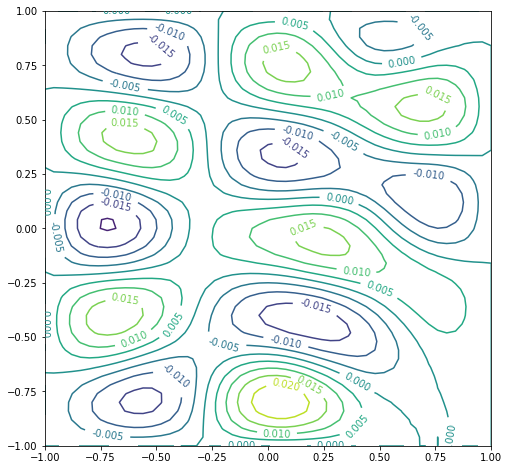

In [ ]:
plt.close()

plt.figure(figsize=(8,8))
ct = plt.contour(xi,yi,uuu,levels=10)
plt.clabel(ct,inline=2,fontsize=10)

Text(0.75, 0, '$\\mu$(0,0)=0.011722570002652831')

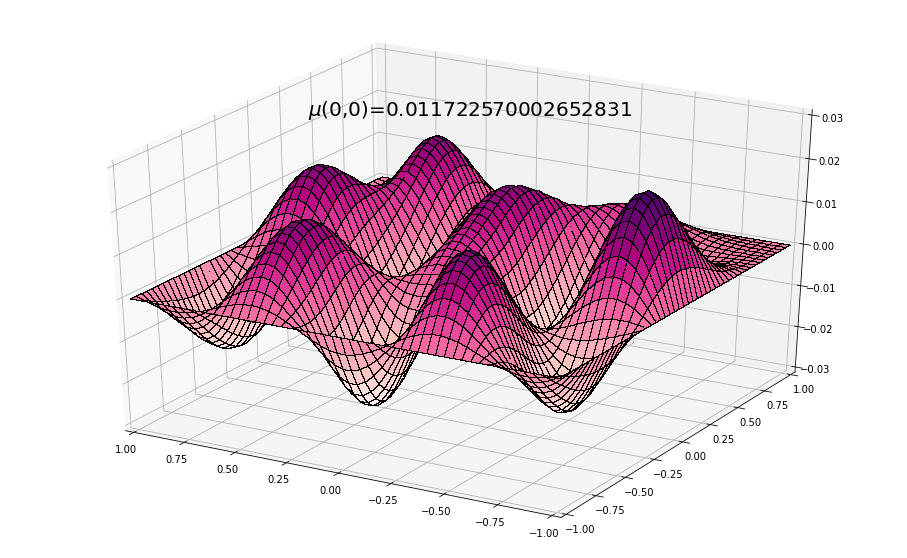

In [ ]:
plt.close()

N = 24
D,x = cheb(N)
y = x
xx, yy = np.meshgrid(x,y)
xx = xx.flatten() ; yy = yy.flatten()
f = np.e ** (-10 * ((yy-1)**2 + (xx-0.5)**2))

matrix = np.zeros_like(D**2)
input = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
matrix[1:N,1:N] = np.reshape(input,(N-1,-1)) ; matrix[0,0] = 1 ; matrix[N,N] = 1

I = np.eye(N+1)
k = 9
L = np.kron(I,matrix) + np.kron(matrix,I) + k**2 * np.eye((N+1)**2)

u = np.linalg.inv(L) * np.matrix(f).T

uu = np.reshape(u,(N+1,-1))
uu[:,0] = 0 ; uu[0,:] = 0 ; uu[:,N] = 0 ; uu[N,:] = 0

value = uu[int(N/2),int(N/2)]

xx, yy = np.meshgrid(x,y)

xxx = np.arange(-1,1 +0.04,0.04)
yyy = np.arange(-1,1 +0.04,0.04)

xi, yi =np.meshgrid(xxx,yyy)

interp_spline = interp2d(xx,yy,uu,kind='cubic')
uuu = interp_spline(xxx,yyy)

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')
ax.plot_surface(yi,xi,uuu,rstride=1,cstride=1,cmap=cm.RdPu,linewidth=0.005,edgecolors='black',antialiased=False)
ax.set_xlim(1,-1) ; ax.set_ylim(-1,1) ; ax.set_zlim(-0.03,0.03)
ax.text(0.75,0,0.03,r"$\mu$(0,0)="+str(value),fontsize=20)


<a list of 42 text.Text objects>

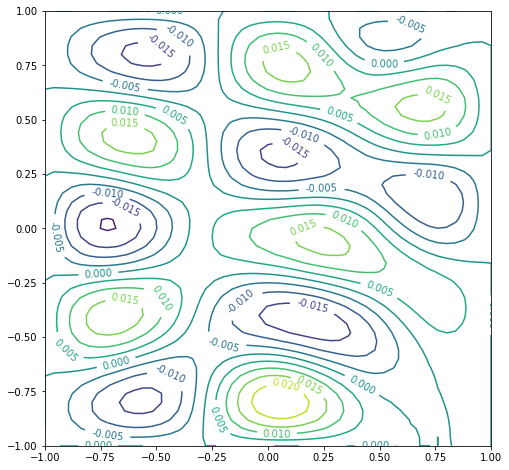

In [ ]:
plt.close()

plt.figure(figsize=(8,8))
ct = plt.contour(xi,yi,uuu,levels=10)
plt.clabel(ct,inline=2,fontsize=10)

[-0.02698059  0.11245209  0.210444   -0.76244019 -0.78049452  2.40618294
  1.77350127 -4.51926713 -2.58610983  5.22542545  2.29385552 -3.44441088
 -1.09202418  1.08356233  0.19821011 -0.10150461  0.00959823]


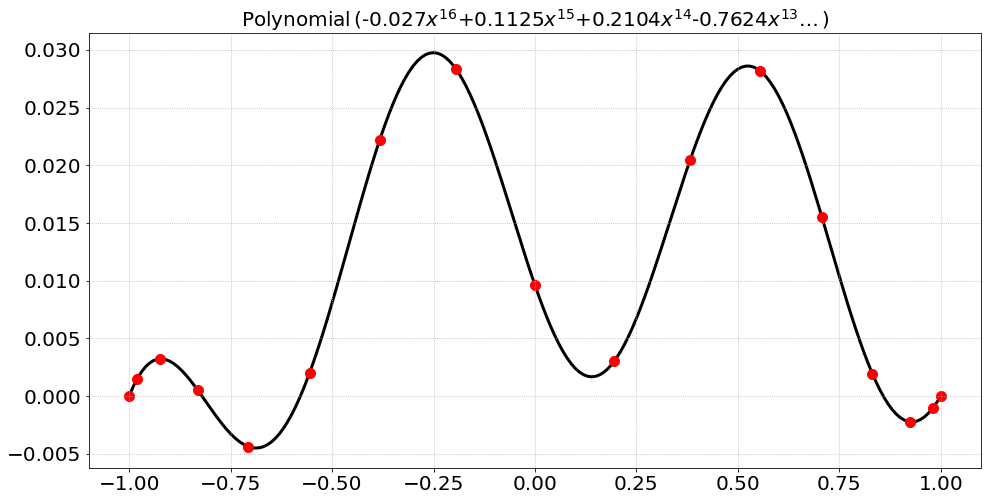

In [ ]:
plt.close()

N = 16
D ,x = cheb(N)
matrix = D**2 + 4*D + np.diagflat(np.e ** x)
D2 = np.delete(np.delete(matrix,[0,N],0),[0,N],1)
f = np.sin(8 *x[1:N])
u = np.linalg.solve(D2,f)
u = np.append(np.append([0],u),0)

xx = np.arange(-1,1 +0.01,0.01)
fit = polyfit(x,u,N)
uu = polyval(fit,xx)

s = []
for i in fit:
  s.append(str(round(i,4)))

plt.figure(figsize=(16,8))
plt.plot(xx,uu,linewidth=3,color='black',zorder=0)
plt.scatter(x,u,marker='o',s=100,color='red')
plt.grid(linestyle=':')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Polynomial$\,$('+s[0]+r'$x^{16}$+'+s[1]+r'$x^{15}$+'+s[2]+r'$x^{14}$'+s[3]+r'$x^{13}\ldots\,$)',fontsize=20)

print(fit)

[-0.02698059  0.11245209  0.210444   -0.76244019 -0.78049452  2.40618294
  1.77350127 -4.51926713 -2.58610983  5.22542545  2.29385552 -3.44441088
 -1.09202418  1.08356233  0.19821011 -0.10150461  0.00959823]


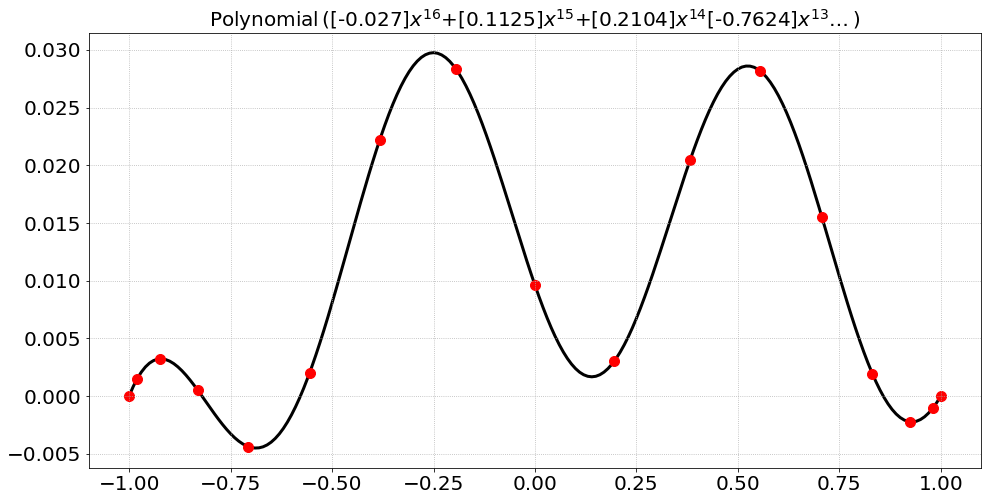

In [ ]:
plt.close()

N = 16
D ,x = cheb(N)
matrix1 = D**2 + 4*D + np.diagflat(np.e ** x)

matrix = np.zeros_like(matrix1)
input = np.delete(np.delete(matrix1,[0,N],0),[0,N],1)
matrix[1:N,1:N] = np.reshape(input,(N-1,-1)) ; matrix[0,0] = 1 ; matrix[N,N] = 1

f = np.sin(8 *x)

u = np.linalg.inv(matrix) * np.matrix(f).T
u[0] = 0 ; u[N] = 0

xx = np.arange(-1,1 +0.01,0.01)
fit = polyfit(x,u,N)
uu = polyval(fit,xx)

s = []
for i in fit:
  s.append(str(np.round(i,4)))

plt.figure(figsize=(16,8))
plt.plot(xx,uu,linewidth=3,color='black',zorder=0)
plt.scatter(x,np.array(u.flatten()),marker='o',s=100,color='red')
plt.grid(linestyle=':')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Polynomial$\,$('+s[0]+r'$x^{16}$+'+s[1]+r'$x^{15}$+'+s[2]+r'$x^{14}$'+s[3]+r'$x^{13}\ldots\,$)',fontsize=20)

print(fit.flatten())